<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/Richardson_Maga%C3%B1a_Pichardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


"""
Problema: u_t = u_xx, 0 < x < 1, t > 0
Condiciones de frontera: u(0,t) = u(1,t) = 0
Condición inicial: u(x,0) = sin(πx)

Método implícito de Richardson:
Ecuación en diferencias: (I + Δt·A)u^{n+1} = u^n
Donde A es la matriz de discretización espacial
"""


'\nProblema: u_t = u_xx, 0 < x < 1, t > 0\nCondiciones de frontera: u(0,t) = u(1,t) = 0\nCondición inicial: u(x,0) = sin(πx)\n\nMétodo implícito de Richardson:\nEcuación en diferencias: (I + Δt·A)u^{n+1} = u^n\nDonde A es la matriz de discretización espacial\n'

In [37]:

def matriz_A(n):
    """Crea matriz tridiagonal 3 en diagonal, -1 en sub/super diagonal"""
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 3
        if i > 0:
            A[i, i-1] = -1
        if i < n-1:
            A[i, i+1] = -1
    return sp.Matrix(A)

n = 9  # número de nodos internos
A = matriz_A(n)
print("Matriz A creada:")
print(A)



Matriz A creada:
Matrix([[3.00000000000000, -1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-1.00000000000000, 3.00000000000000, -1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.00000000000000, 3.00000000000000, -1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.00000000000000, 3.00000000000000, -1.00000000000000, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, -1.00000000000000, 3.00000000000000, -1.00000000000000, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, -1.00000000000000, 3.00000000000000, -1.00000000000000, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, -1.00000000000000, 3.00000000000000, -1.00000000000000, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.00000000000000, 3.00000000000000, -1.00000000000000], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.00000000000000, 3.00000000000000]])


In [38]:

def f(x):
    return np.sin(np.pi * x)

# Crear vector b usando comprensión de lista
x_nodes = [0.1 * (i + 1) for i in range(n)]  # puntos: 0.1, 0.2, ..., 0.9
b = sp.Matrix([f(x) for x in x_nodes])
print("\nVector b:")
print(b)




Vector b:
Matrix([[0.309016994374947], [0.587785252292473], [0.809016994374947], [0.951056516295154], [1.00000000000000], [0.951056516295154], [0.809016994374947], [0.587785252292473], [0.309016994374948]])


In [39]:

def richardson(A, b, j, h=0.01):
    S = []
    u_actual = b.copy()
    n_nodos = len(b)

    # Matriz del sistema: I + h*A
    I = sp.eye(n_nodos)
    sistema = I + h * A

    for i in range(j + 1):
        # Guardar solución actual
        S.append(np.array(u_actual, dtype=float).flatten())

        # Resolver sistema para siguiente paso temporal
        if i < j:  # No resolver después del último paso
            u_actual = sistema.LUsolve(u_actual)

    return np.array(S)




In [40]:
j = 20  # número de pasos temporales
h = 0.01  # paso temporal
U = richardson(A, b, j, h)

print(f"\nSolución calculada con {j} pasos temporales")
print(f"Forma de U: {U.shape}") #devuelve una tubla con filas y columnas




Solución calculada con 20 pasos temporales
Forma de U: (21, 9)


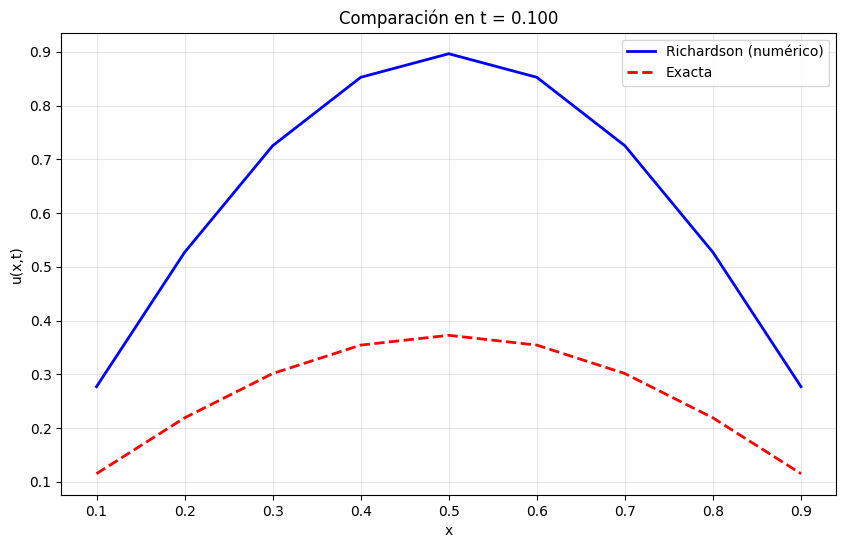

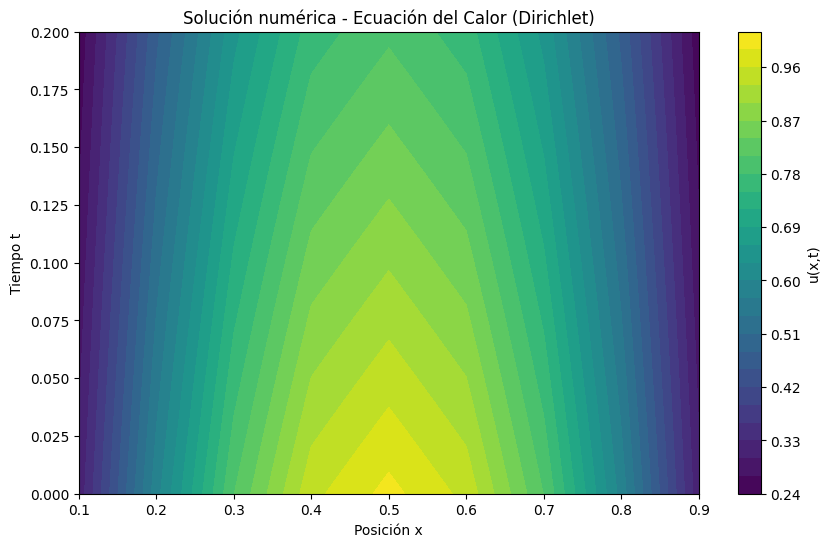

Explicación: La gráfica muestra la evolución temporal de la temperatura.
Se observa cómo la solución decae exponencialmente debido a la difusión.


In [41]:
# Malla para gráficas
x = np.linspace(0.1, 0.9, n)  # nodos internos en x
t = np.linspace(0, j * h, j + 1)  # tiempos
X, T = np.meshgrid(x, t)

# Gráfica 2D: Comparación en tiempo específico
t_especifico = 10  # índice del tiempo a comparar
t_valor = t[t_especifico]

plt.figure(figsize=(10, 6))

# Solución numérica
plt.plot(x, U[t_especifico], 'b-', linewidth=2, label='Richardson (numérico)')

# Solución exacta
def solucion_exacta(x, t):
    """Solución exacta: u(x,t) = e^(-π²t)sin(πx)"""
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)
u_exacta = solucion_exacta(x, t_valor)
plt.plot(x, u_exacta, 'r--', linewidth=2, label='Exacta')

plt.title(f'Comparación en t = {t_valor:.3f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Mapa de colores 2D
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, T, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour, label='u(x,t)')
plt.title('Solución numérica - Ecuación del Calor (Dirichlet)')
plt.xlabel('Posición x')
plt.ylabel('Tiempo t')
plt.show()

print("Explicación: La gráfica muestra la evolución temporal de la temperatura.")
print("Se observa cómo la solución decae exponencialmente debido a la difusión.")



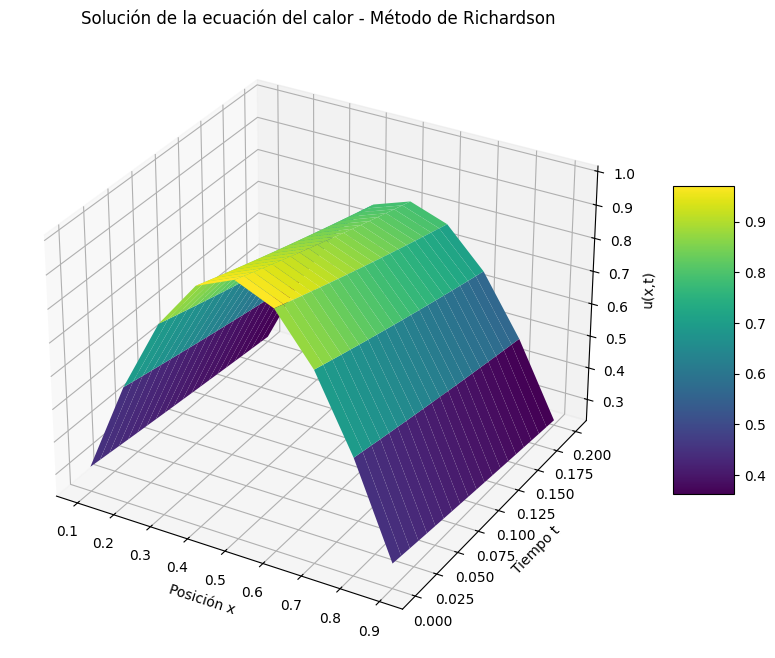

Explicación 3D: Muestra la superficie solución u(x,t).
La altura representa la temperatura en cada punto y tiempo.


In [42]:
# Gráfica 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, U, cmap=cm.viridis,
                      linewidth=0, antialiased=True)
ax.set_title('Solución de la ecuación del calor - Método de Richardson')
ax.set_xlabel('Posición x')
ax.set_ylabel('Tiempo t')
ax.set_zlabel('u(x,t)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

print("Explicación 3D: Muestra la superficie solución u(x,t).")
print("La altura representa la temperatura en cada punto y tiempo.")



In [43]:
# EJERCICIO 5: Simplificación del sistema

print("\n" + "="*50)
print("EJERCICIO 5: ¿Es necesario resolver el sistema 9×9?")
print("="*50)
print("RESPUESTA: Para este problema específico SÍ podemos simplificar.")
print("La matriz A es tridiagonal y simétrica, por lo que podemos usar:")
print("Algoritmo de Thomas (TDMA) para sistemas tridiagonales")
print("Descomposición LU especializada para matrices tridiagonales")
print("Aprovechar la simetría para métodos iterativos más eficientes")



EJERCICIO 5: ¿Es necesario resolver el sistema 9×9?
RESPUESTA: Para este problema específico SÍ podemos simplificar.
La matriz A es tridiagonal y simétrica, por lo que podemos usar:
Algoritmo de Thomas (TDMA) para sistemas tridiagonales
Descomposición LU especializada para matrices tridiagonales
Aprovechar la simetría para métodos iterativos más eficientes


In [44]:

# EJERCICIO 6: Detalle de precisión
print("\n" + "="*50)
print("EJERCICIO 6: Detalle con la precisión")
print("="*50)
print("DETECTADO: El paso temporal h = 0.01 puede ser muy grande.")
print("PROBLEMAS:")
print(" Error de truncamiento significativo")
print(" Posibles inestabilidades numéricas")
print("Discrepancia con solución exacta visible en gráficas")

print("\nSOLUCIÓN PROPUESTA:")
print(" Reducir h (ej: h = 0.001)")
print(" Usar método de Crank-Nicolson para mejor precisión")



EJERCICIO 6: Detalle con la precisión
DETECTADO: El paso temporal h = 0.01 puede ser muy grande.
PROBLEMAS:
 Error de truncamiento significativo
 Posibles inestabilidades numéricas
Discrepancia con solución exacta visible en gráficas

SOLUCIÓN PROPUESTA:
 Reducir h (ej: h = 0.001)
 Usar método de Crank-Nicolson para mejor precisión
